# Implementing Regression
Regression involves quantifying the relationship between x & y variables. You'll often want to visualise the data to determine if the variables are correlated.

## Linear Equation
- $y = mx+b$
- y = predictive variable
- x = x variable value
- m = slope 
- b = y intercept

## Best Fit Slope
To identify the slope that best fits the data you multiply the mean of x by the mean of y, minus the mean of all x's times y's divided by the mean of x's squared minus the mean of x's squared minus the mean of x's squared.

$$m = \frac{\bar{x} . \bar{y} - \overline{xy}}{(\bar{x})^2-\bar{x}^2}$$

## Best Fit Y Intercept
Intercept is the mean of the y's minus the slope multiplied by the mean of the x's

$$b = \bar{y} - m.\bar{x}$$

In [3]:
from statistics import mean
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

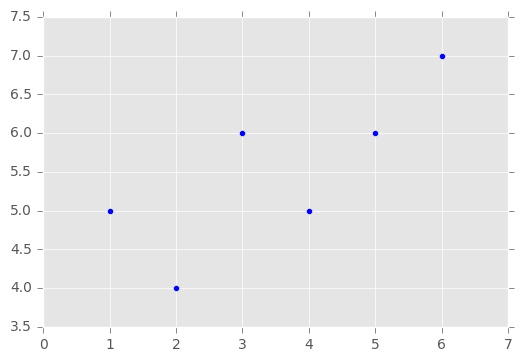

In [5]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.figure()
plt.scatter(xs, ys)
plt.show()

## Calculate Slope and Y Intercept

In [29]:
def best_fit_slope_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs*xs)))
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_intercept(xs, ys)
print(m, b)
regression_line = [(m * x) + b for x in xs]

0.428571428571 4.0


In [31]:
predict_x = 8
predict_y = (m * predict_x) + b

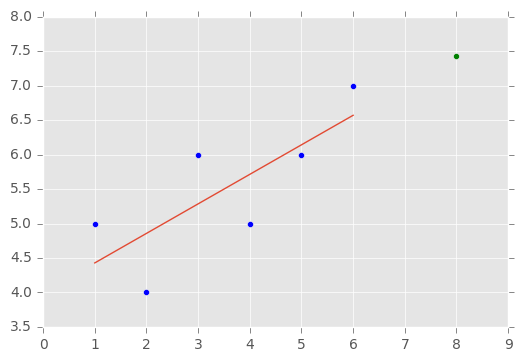

In [35]:
plt.figure()
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, c='g')
plt.plot(xs, regression_line)
plt.show()

## Determining Accuracy: How good is the line fit?
You can determine accruacy by r² or the coefficient of determination. You can calcualte this using squared error.

Error is the distance between the point and the best fit line. You calculate the squared error (SE):
- So you're only dealing with positive numbers
- So you penalise for outliers

$$r^2 = 1 - \frac{SE \hat{y}}{SE \bar{y}}$$

In [37]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [38]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.584415584416


## Generating Data to Test Assumptions

In [39]:
import random

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

0.418646639002


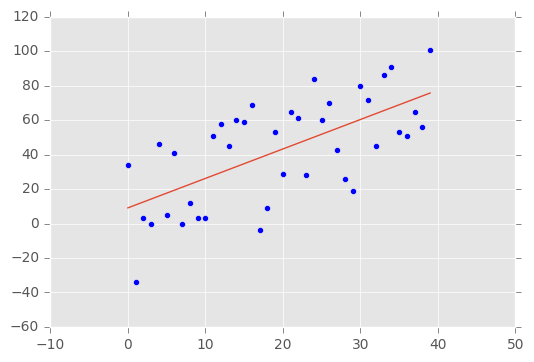

In [49]:
xs, ys = create_dataset(hm=40, variance=40, step=2, correlation='pos')
m, b = best_fit_slope_intercept(xs, ys)
regression_line = [(m * x) + b for x in xs]
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

0.843907216264


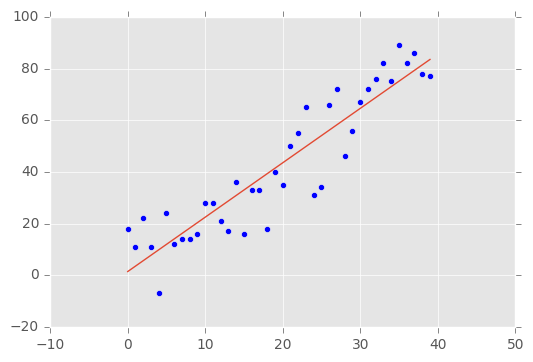

In [51]:
xs, ys = create_dataset(hm=40, variance=20, step=2, correlation='pos')
m, b = best_fit_slope_intercept(xs, ys)
regression_line = [(m * x) + b for x in xs]
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()